In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None) # 요약표시 X

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 확인

In [3]:
path = '/content/drive/MyDrive/dacon/airline/data/'
train = pd.read_csv(path + 'train.csv')

**변수 설명**
- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

- 결측치는 없다.

In [ ]:
train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,2997,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,2998,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,2999,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


- 연속형 변수
  - ~~id : 샘플 아이디(임의의 아이디)~~
  - Age : 나이
  - Flight Distance : 비행 거리
  - Departure Delay in Minutes : 출발 지연 시간
  - Arrival Delay in Minutes : 도착 지연 시간
- 이산형 변수
  - 명목 변수
    - Gender : 성별
    - Customer Type : Disloyal 또는 Loyal 고객
    - Type of Travel : Business 또는 Personal Travel
    - Class : 등급
    - ~~target : 만족 여부(반응 변수)~~
  - 순위 변수
    - Seat comfort : 좌석 만족도
    - Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
    - Food and drink : 식음료 만족도
    - Gate location : 게이트 위치 만족도
    - Inflight wifi service : 기내 와이파이 서비스 만족도
    - Inflight entertainment : 기내 엔터테인먼트 만족도
    - Online support : 온라인 지원 만족도
    - Ease of Online booking : 온라인 예매 편리성 만족도
    - On-board service : 탑승 서비스 만족도
    - Leg room service : Leg room 서비스 만족도
    - Baggage handling : 수하물 처리 만족도
    - Checkin service : 체크인 서비스 만족도
    - Cleanliness : 청결도 만족도
    - Online boarding : 온라인보딩 만족도


In [ ]:
train['id'].nunique()
# 중복된 id가 있나 확인해 보았으나 총 3000개의 데이터 모두 다른 id로 이루어져있음 --> 분석시 제외

3000

# 반응 변수 탐색

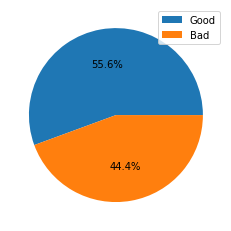

In [ ]:
plt.pie(train['target'].value_counts(), autopct='%1.1f%%')
plt.legend(['Good', 'Bad'])
plt.show()

- 반응변수의 분포를 확인한 결과 큰 차이가 나지 않는 것으로 판단한다.
- 하지만 만족하는 비율이 조금 높은 것을 알 수 있다.

# 연속형 변수 탐색

In [9]:
continuous_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train[continuous_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,15.634333,15.922000
std,15.108802,1028.109117,45.083228,45.203411
min,7.000000,52.000000,0.000000,0.000000
25%,27.000000,1348.250000,0.000000,0.000000
50%,39.000000,1937.000000,0.000000,0.000000
75%,51.000000,2547.250000,12.000000,13.000000
max,80.000000,6882.000000,1128.000000,1115.000000


- 기술 통계량을 살펴 보았을 때, Age, Flight Dstance 변수에는 별 다른 문제가 보이지는 않는다.
- Departure Delay in Minutes, Arrival Delay in Minutes 변수는 우선 중앙 값이 0인 것으로 보아 반 이상의 관측치가 0에 분포하고 있다. 
- 또한 최대 값과 평균이 큰 차이가 난다.

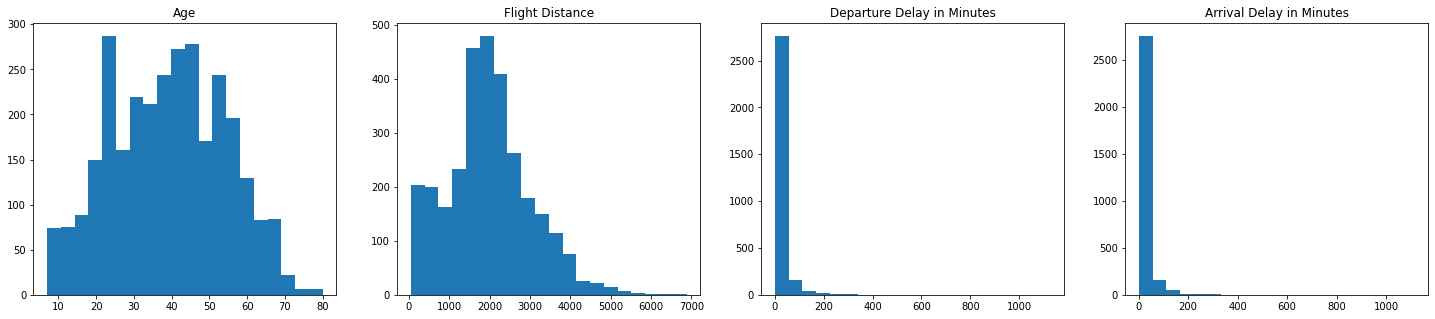

In [ ]:
plt.figure(figsize=(25,5))
for i in range(len(continuous_cols)):
  plt.subplot(1, 4, i+1)
  plt.title(continuous_cols[i])
  plt.hist(train[continuous_cols[i]], bins=20)

- **Age 변수**는 정규분포와 유사한 분포를 띄고 있다.

**Departure/Arrival Delay in Minutes 변수**
- 기술 통계량에서 살펴본 바와 같이 대부분 0에 분포하고 있다.
- 두 변수가 비슷한 분포를 가지고 있는 것으로 보인다.
- 오른쪽으로 꼬리가 긴 분포형태이므로 로그변환이 필요할 수도 있다. (log1p)
 

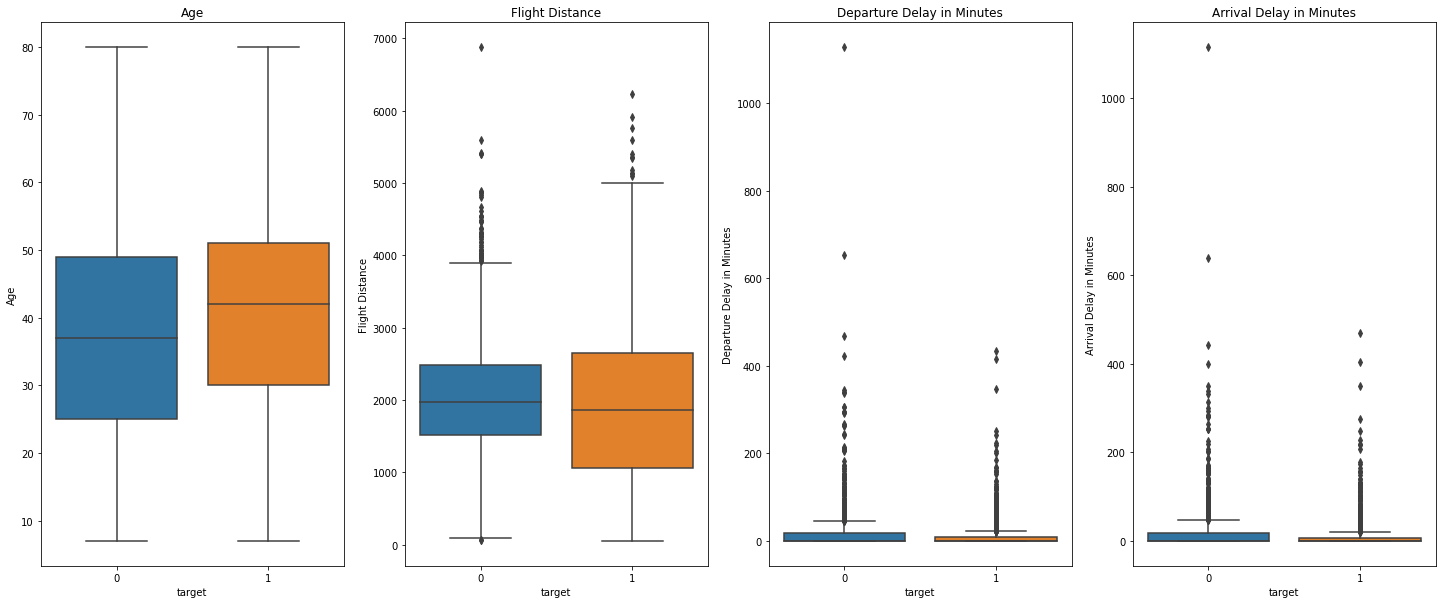

In [ ]:
plt.figure(figsize=(25,10))
for i in range(len(continuous_cols)):
  plt.subplot(1, 4, i+1)
  plt.title(continuous_cols[i])
  sns.boxplot(x = 'target', y = continuous_cols[i], data=train)

- target에 따른 변수의 분포차이는 크게나 보이지는 않는다.
- 앞서 확인한 바와 같이 Departure/Arrival Delay in Miniutes 두 변수는 비슷한 분포를 갖는다. 
  --> 상관관계를 확인한다.

In [ ]:
train['Departure Delay in Minutes'].corr(train['Arrival Delay in Minutes'])

0.9768732919464287

- 상관계수를 확인한 결과 Departure/Arrival Delay in Miniutes 두 변수는 큰 양의 상관관계를 가지고 있음을 알 수 있다.
- 두 변수 중 하나의 변수만 사용해도 괜찮을 것 같다. 
  --> 만족도는 도착시간이 지연된 경우에 더 영향을 미칠 것으로 생각되므로 도착 지연 시간 변수를 사용한다. 
- 도착 시간 지연 여부를 나타내는 컬럼을 추가해도 좋을 것 같다. 

# 이산형 변수 탐색

In [10]:
discrete_cols = list(set(train.columns) - set(continuous_cols) - {'id', 'target'})

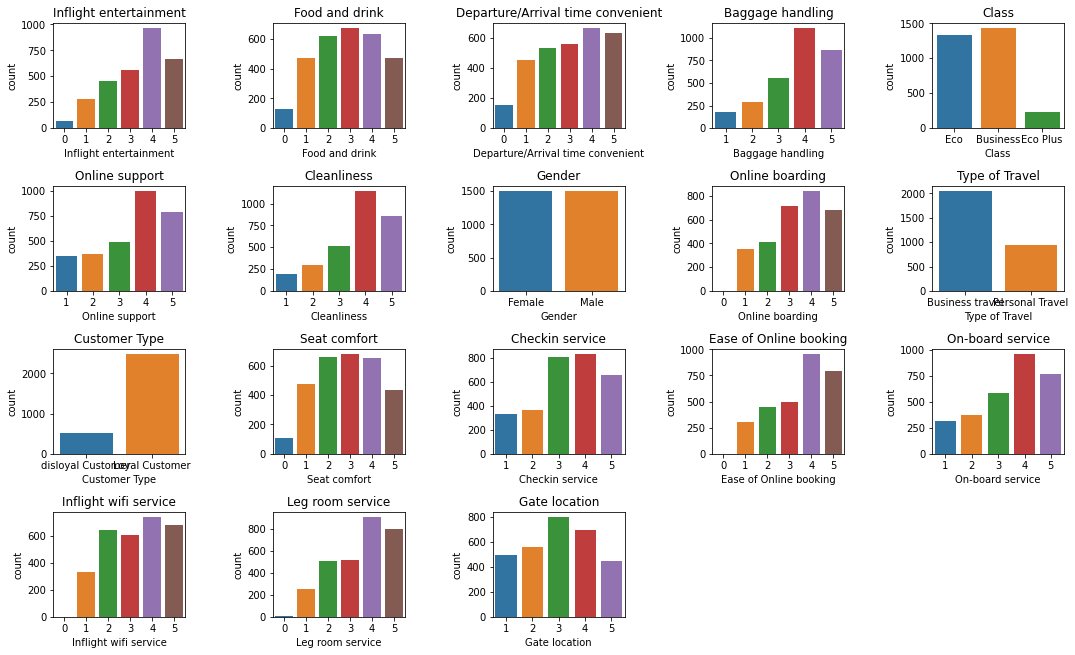

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(discrete_cols)):
  plt.subplot(4, 5, i+1)
  plt.title(discrete_cols[i])
  sns.countplot(x = discrete_cols[i], data=train)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- 분포가 크게 한쪽으로 치우친 변수는 없는걸로 보인다.
- 만족도 변수의 척도가 0 ~ 5, 1 ~ 5인 것으로 보이는데, 1 ~ 5인 경우 0의 응답이 없어서 1 ~ 5 척도로 보이는 것일 수 있으므로 주의가 필요하다. (test 데이터에는 0이 존재할 수도 있다.) 반면 1 ~ 5인 척도인데 0이 결측치일 수도 있다. -> 뒤에서 자세히 살펴보도록 한다.
- 만족도 변수의 척도는 모두 0 ~ 5라고 생각하고 분석을 하려고 한다.

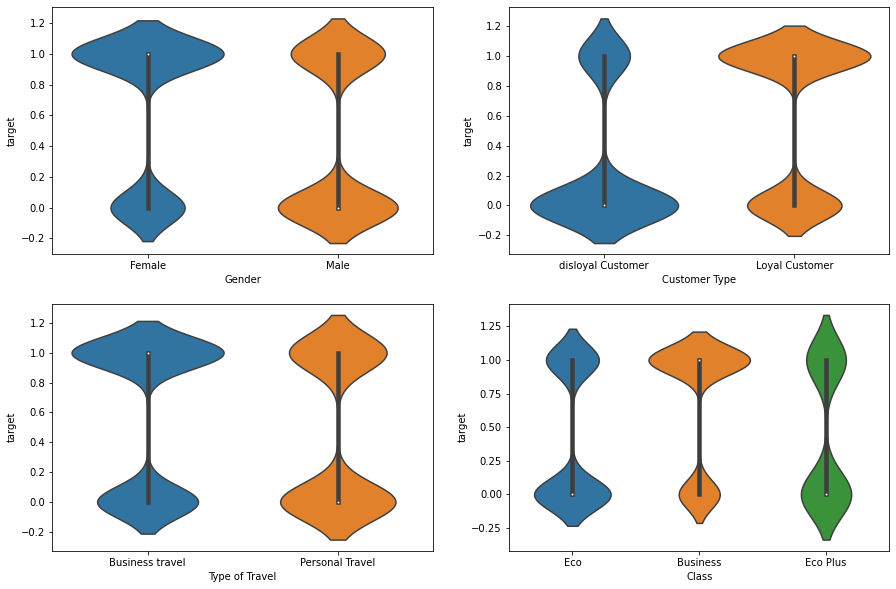

In [11]:
categorical_cols = train.columns[train.dtypes == 'object']

plt.figure(figsize=(15,10))
for i in range(len(categorical_cols)):
  plt.subplot(2, 2, i+1)
  sns.violinplot(x = train[categorical_cols[i]], y = train['target'])
plt.show()

- 명목 변수의 분포를 확인하기 위해 violine plot을 활용한다. 
- Customer Type 변수에서 disloyal인 경우 0에 많이 분포하고, loyal인 경우 1에 많이 분포하는 것을 알 수 있다. 즉 Customer Type 변수에 따라 만족도의 차이가 있음 확인할 수 있다.
- 그 외의 변수는 미세한 차이는 있어보이나 큰 차이를 보이지는 않는다. 

In [ ]:
def discrete_plot(col):
  f, ax = plt.subplots(1, 3, figsize = (15, 5))
  ax[0].set_title('Full data')
  sns.countplot(x = col, data = train, ax = ax[0], order = sorted(train[col].unique()))
  ax[1].set_title('target 1')
  sns.countplot(x = col, data = train[train['target'] == 1], ax = ax[1], order = sorted(train[col].unique()))
  ax[2].set_title('target 2')
  sns.countplot(x = col, data = train[train['target'] == 0], ax = ax[2], order = sorted(train[col].unique()))

  plt.show()

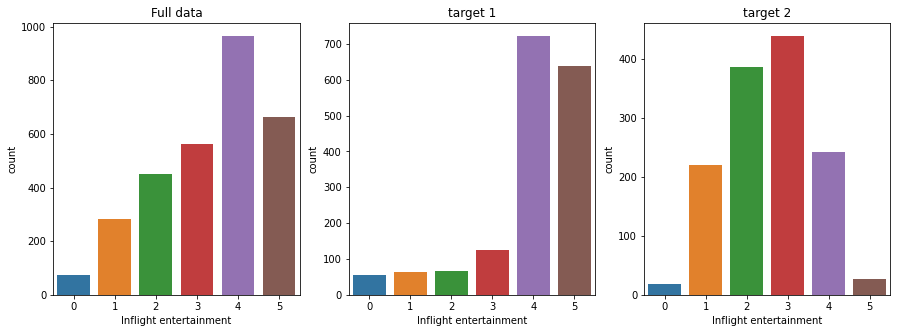

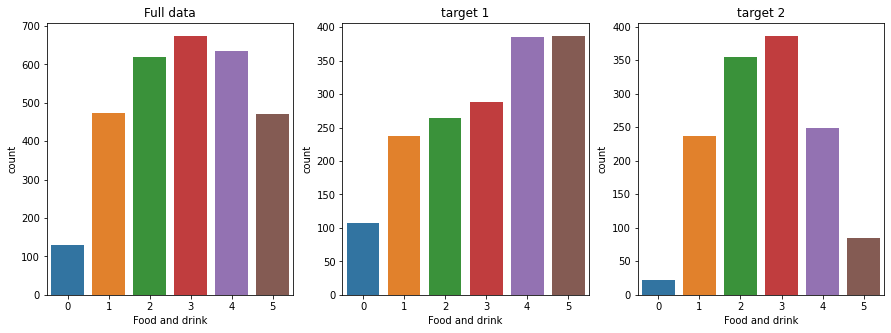

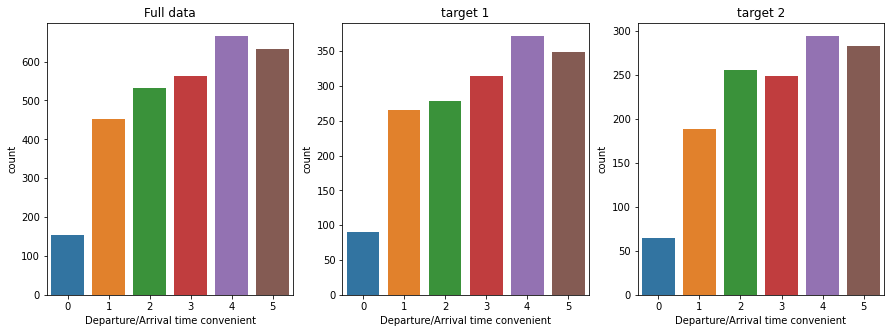

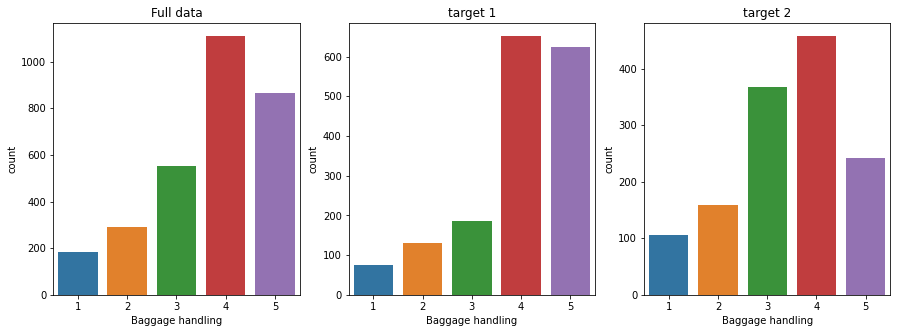

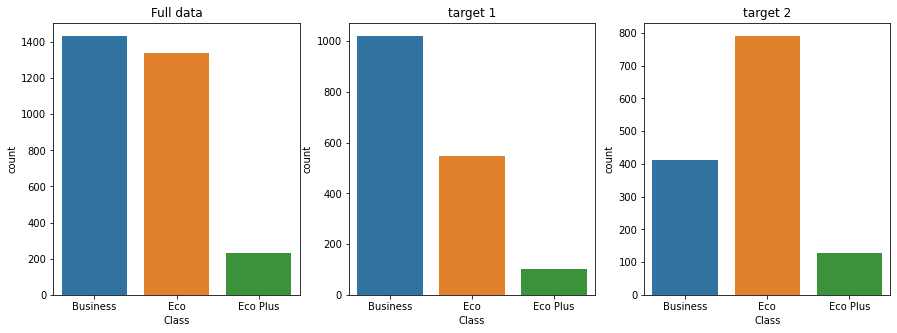

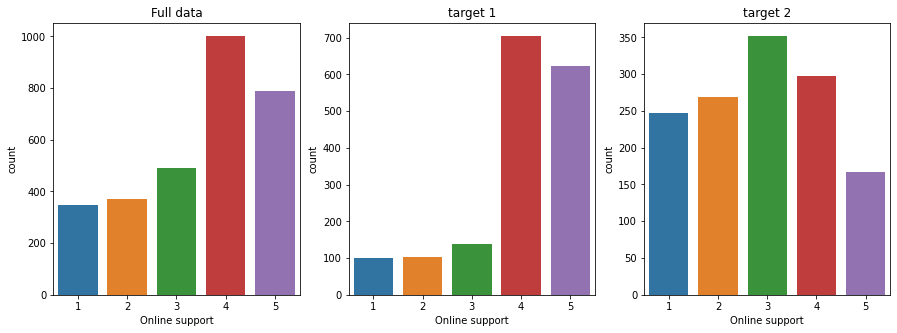

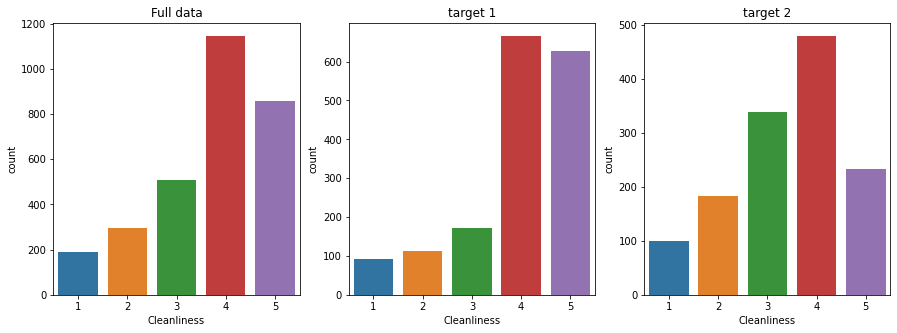

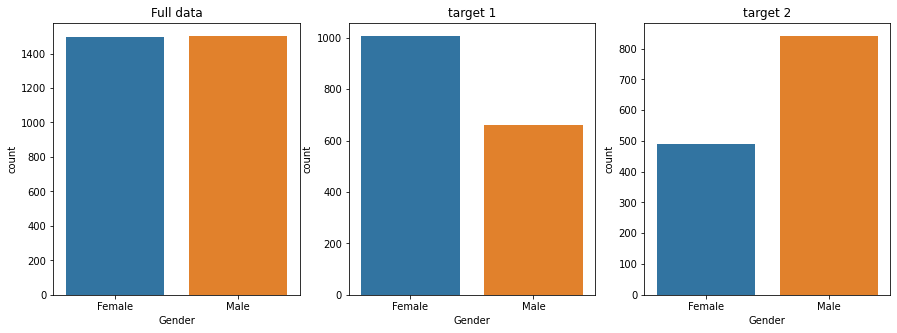

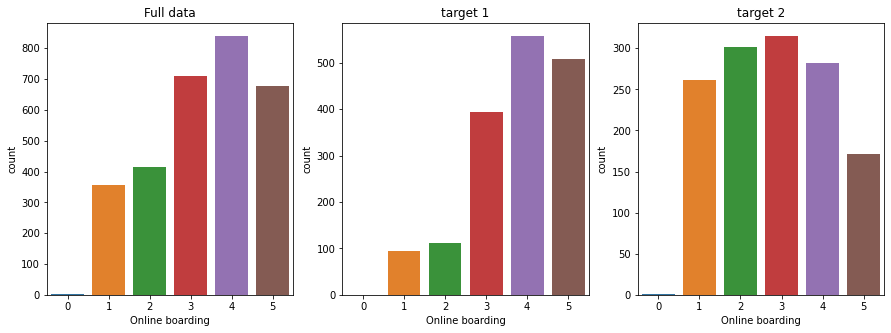

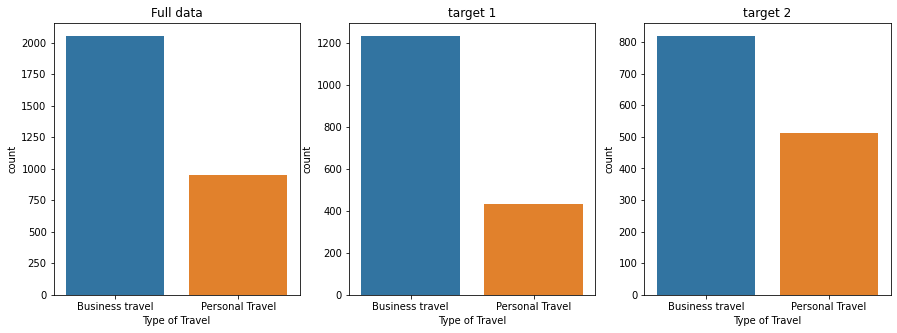

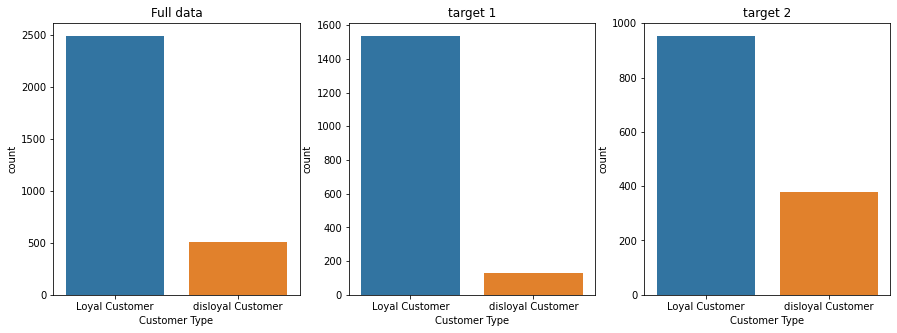

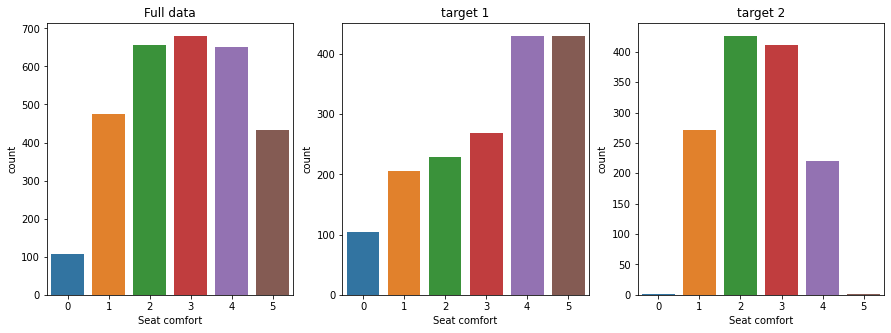

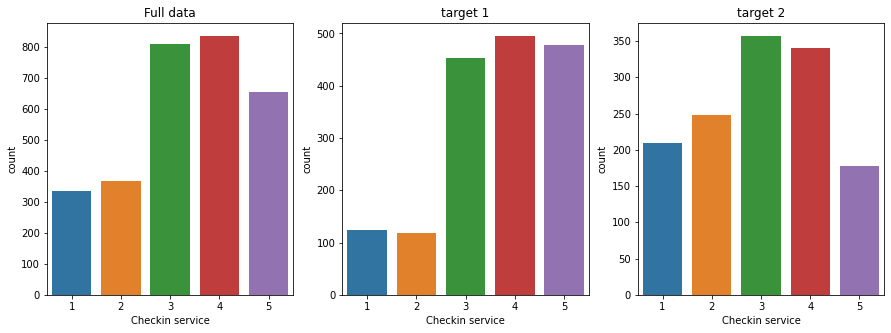

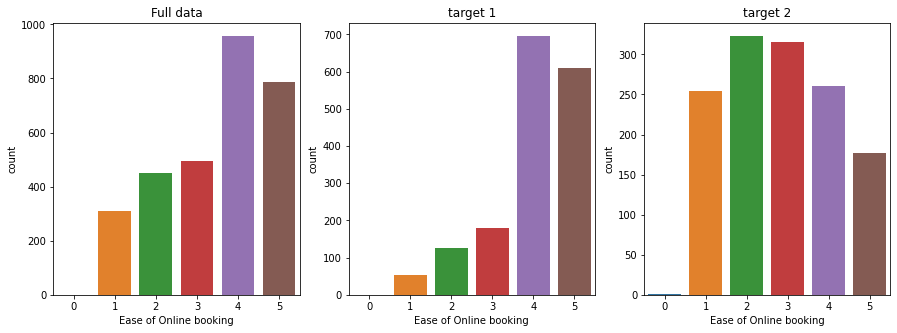

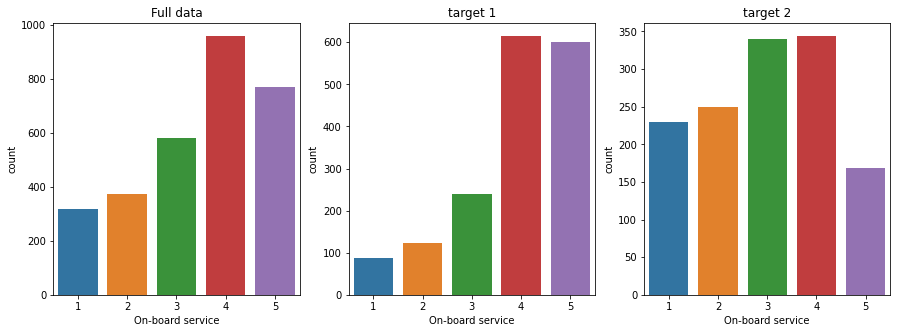

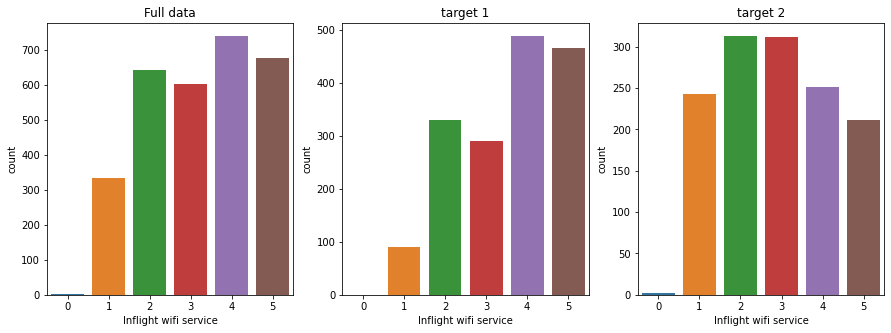

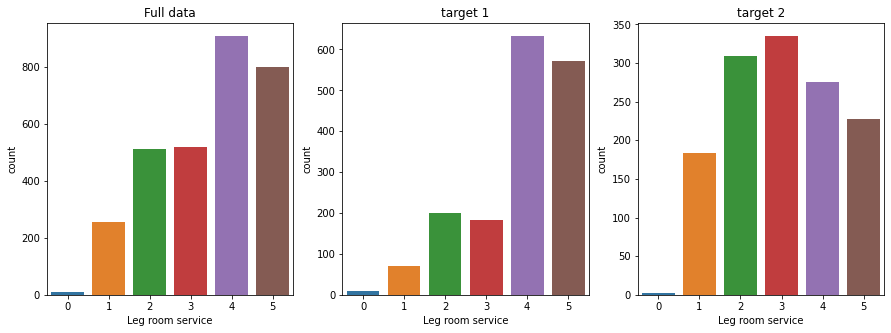

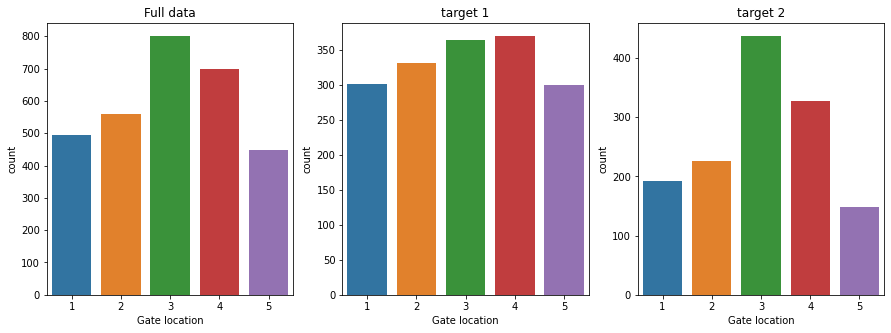

In [ ]:
for i in range(len(discrete_cols)):
  discrete_plot(discrete_cols[i])

- 전체 데이터, target에 따른 분포를 보았을 때, 완전 비슷한 분포를 갖는 변수는 없다.
- 하지만 Departure/Arrival time convenient 변수는 다른 변수에 비해 비슷한 분포를 갖는다. 이는 연속형 변수인 Departure/Arrival Delay in Minutes 함수와 더 연관있을 걸로 생각된다.

- Online support: 1, 2, 3 통합
- Seat comfort: 4, 5 통합
- Ease of Online booking: 1,2,3 통합


In [17]:
satisfaction_cols = list(set(discrete_cols) - set(categorical_cols))

satistsfaction_0 = pd.DataFrame()
for col in satisfaction_cols:
  df = train[train[col] == 0]
  satistsfaction_0 = pd.concat([df, satistsfaction_0])
satistsfaction_0.drop_duplicates()[satisfaction_cols]

,Checkin service,Seat comfort,Online support,Ease of Online booking,Gate location,Inflight entertainment,Inflight wifi service,Online boarding,Leg room service,Departure/Arrival time convenient,Baggage handling,Cleanliness,On-board service,Food and drink
12,3,0,4,5,5,5,3,4,5,0,5,5,5,0
19,5,0,1,1,2,0,1,1,5,0,4,4,5,0
27,4,0,4,1,2,5,2,3,1,5,1,1,1,0
82,3,2,1,2,3,0,2,2,2,5,5,5,5,0
86,4,0,4,3,3,2,5,2,3,5,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,2,0,3,0,2,1,0,0,4,2,4,3,4,3
697,3,0,4,3,1,5,3,3,3,1,3,3,3,1
1035,3,0,2,2,4,5,4,1,2,1,2,2,2,1
1351,4,0,5,2,1,4,3,5,2,5,2,2,2,1


In [21]:
print('중복제거 전: ', satistsfaction_0.shape)
print('중복제거 후: ', satistsfaction_0.drop_duplicates().shape)

중복제거 전:  (477, 24)
중복제거 후:  (229, 24)


- 만족도가 0인 행들을 확인해 보았다. 
- 중복 제거를 하기 전 후의 행의 차이를 보면 반이나 줄어든 것을 볼 수 있다. 한 행에 0의 값이 여러개 존재함을 알 수 있다.
- 0을 결측치로 판단해도 될것같다.

# 상관관계

In [24]:
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

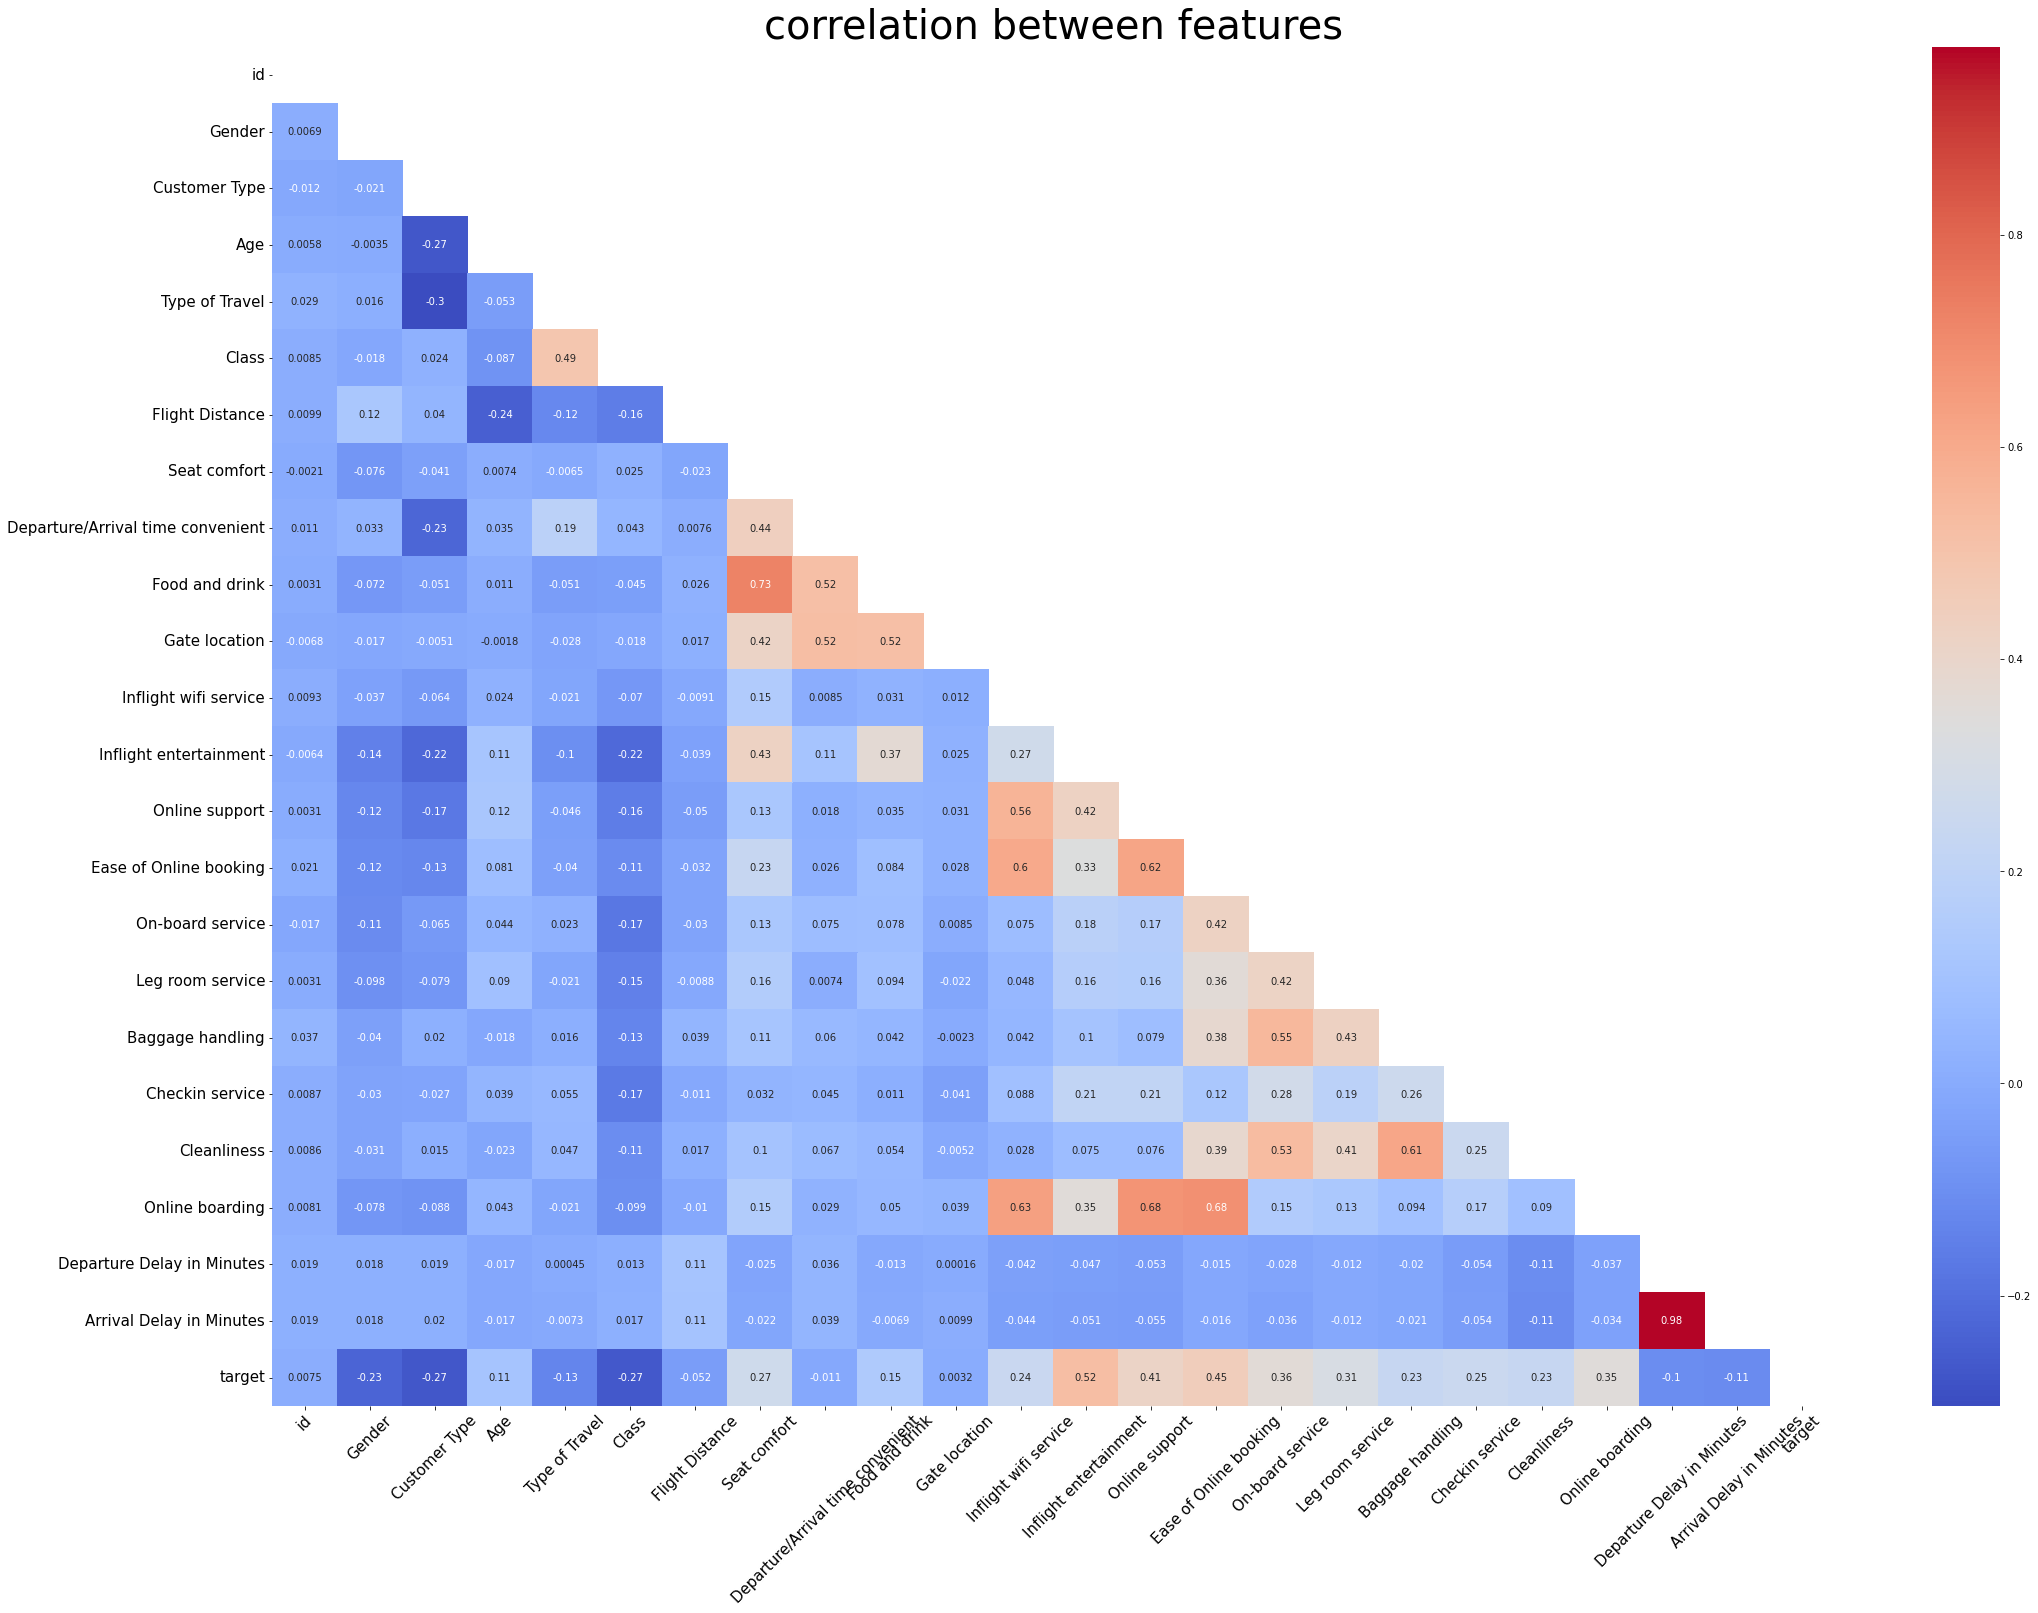

In [25]:
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- Departure Delay in Minutes & Arrival Delay in Minutes 변수들의 상관계수가 앞서 확인했던 바와 같이 가장 높다. (0.98)
- target 변수와 Departure Delay in Minutes & Arrival Delay in Minutes들 간의 상관계수는 -0.1, -0.11 이다. 조금 더 큰 상관관계를 갖는 Arrival Delay in Minutes 변수를 사용한다. 
- Food and drink & Seat comfort 변수의 상관관계가 0.73으로 큰 편임을 알 수 있다.
- target 변수와 Food and drink & Seat comfort들 간의 상관계수는 0.15, 0.27로 Seat comfort가 더 높음을 알 수 있다. 이 변수는 우선 둘다 사용한다. 
- 위 변수 외의 크게 문제보이는 변수는 없어 보인다. 

# 결론

- 제거하는 변수
  - id
  - Departure Delay in Minutes: 다중공선성문제
  - Departure/Arrival time convenient
- 변환이 필요한 변수
  - Departure Delay in Minutes or Arrival Delay in Minutes: log1p 변환
  - Online support: 1, 2, 3 통합
  - Seat comfort: 4, 5 통합
  - Ease of Online booking: 1,2,3 통합
- 결측치
  - 만족도 변수의 '0'
- 파생변수
  - 출발/도착 지연 여부 변수
